In [19]:
import cv2
import pandas as pd
import time

# Load the pre-trained face and eye cascade classifiers
face_cascade = cv2.CascadeClassifier(r"C:\Users\Najeeb\Downloads\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\Najeeb\Downloads\haarcascade_eye.xml")

# Create a VideoCapture object to capture video from the default camera
cap = cv2.VideoCapture(0)

# Initialize variables for eye detection and duration of closed eyes
eyes_detected = False
closed_eyes_duration = 0
eyes_closed_start_time = 0

# Create an empty pandas dataframe to store the duration of closed eyes
df = pd.DataFrame(columns=['start_time', 'end_time', 'duration'])

# Start the video stream
while True:
    # Read a frame from the video stream
    ret, frame = cap.read()

    # Convert the frame to grayscale for faster processing
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # For each face detected, detect eyes and draw rectangles around them
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        eyes_detected = True

    # If eyes are detected, reset the duration of closed eyes and update the eyes_closed_start_time
    if eyes_detected:
        closed_eyes_duration = 0
        eyes_closed_start_time = 0
        eyes_detected = False
    # If eyes are not detected and eyes_closed_start_time is not set, set the eyes_closed_start_time
    elif eyes_closed_start_time == 0:
        eyes_closed_start_time = time.time()
    # If eyes are not detected and eyes_closed_start_time is set, calculate the duration of closed eyes
    else:
        closed_eyes_duration = time.time() - eyes_closed_start_time
        # If the duration of closed eyes is more than 4 seconds, add a new row to the pandas dataframe
        if closed_eyes_duration > 2:
            df = df.append({'start_time': eyes_closed_start_time, 'end_time': time.time(), 'duration': closed_eyes_duration}, ignore_index=True)
            eyes_closed_start_time = 0

    # Display the resulting frame
    cv2.imshow('frame',frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Release the VideoCapture object and close all windows
cap.release()
cv2.destroyAllWindows()

# Print the pandas dataframe
print(df.head())

Empty DataFrame
Columns: [start_time, end_time, duration]
Index: []


In [16]:
import cv2
import time

face_cascade = cv2.CascadeClassifier(r"C:\Users\Najeeb\Downloads\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\Najeeb\Downloads\haarcascade_eye.xml")


video_capture = cv2.VideoCapture(0)

start_time = None
duration_threshold = 2  # Change this value to set the duration threshold in seconds

while True:
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)
        
        if len(eyes) == 0:
            if start_time is None:
                start_time = time.time()
            elif time.time() - start_time >= duration_threshold:
                print("Eyes closed for more than {} seconds!".format(duration_threshold))
        else:
            start_time = None
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)
    
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()



Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!
Eyes closed for more than 2 seconds!


In [9]:
import cv2

# Load the pre-trained face and mouth cascade classifiers
face_cascade = cv2.CascadeClassifier(r"C:\Users\Najeeb\Downloads\haarcascade_frontalface_default.xml")
mouth_cascade = cv2.CascadeClassifier(r"C:\Users\Najeeb\Downloads\haarcascade_mcs_mouth.xml")

# Create a VideoCapture object to capture video from the default camera
cap = cv2.VideoCapture(0)

# Initialize variables for mouth detection and yawn detection
mouth_detected = False
yawn_detected = False

# Start the video stream
while True:
    # Read a frame from the video stream
    ret, frame = cap.read()

    # Convert the frame to grayscale for faster processing
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # For each face detected, detect mouths and draw rectangles around them
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        mouths = mouth_cascade.detectMultiScale(roi_gray)
        for (mx,my,mw,mh) in mouths:
            cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,255,0),2)
            mouth_detected = True

    # If mouth is detected and yawn is not already detected, set yawn_detected to True
    if mouth_detected and not yawn_detected:
        yawn_detected = True
        print("Yawn detected")

    # If mouth is not detected, reset yawn_detected to False
    elif not mouth_detected:
        yawn_detected = False

    # Reset mouth_detected to False for the next frame
    mouth_detected = False

    # Display the resulting frame
    cv2.imshow('frame',frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture object and close all windows
cap.release()
cv2.destroyAllWindows()


Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected
Yawn detected


In [2]:
#blinkk

<AxesSubplot:xlabel='time'>

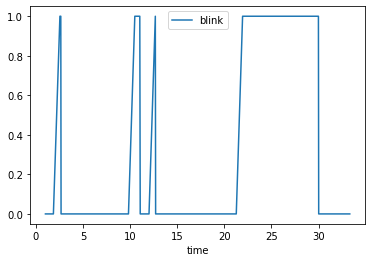

In [1]:


from scipy.spatial import distance
from imutils import face_utils
import imutils
import dlib
import cv2
import pandas as pd
import time

def eye_aspect_ratio(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

thresh = 0.25
frame_check = 20
detect = dlib.get_frontal_face_detector()
predict = dlib.shape_predictor(r"C:\Users\Najeeb\Downloads\shape_predictor_68_face_landmarks.dat\shape_predictor_68_face_landmarks.dat")

(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

cap=cv2.VideoCapture(0)
flag=0
start_time = time.time()
df = pd.DataFrame(columns=["real time", "time", "blink"])
while True:
    ret, frame=cap.read()
    frame = imutils.resize(frame, width=450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    subjects = detect(gray, 0)
    for subject in subjects:
        shape = predict(gray, subject)
        shape = face_utils.shape_to_np(shape)#converting to NumPy Array
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        ear = (leftEAR + rightEAR) / 2.0
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
        if ear < thresh:
            flag += 1
            if flag >= frame_check:
                cv2.putText(frame, "*****ALERT!*****", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                cv2.putText(frame, "*****ALERT!*****", (10,325),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                current_time = time.time()
                df = df.append({"real time": time.strftime("%H:%M:%S"), "time": current_time - start_time, "blink": 1}, ignore_index=True)
        else:
            flag = 0
            df = df.append({"real time": time.strftime("%H:%M:%S"), "time": time.time() - start_time, "blink": 0}, ignore_index=True)
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        cv2.destroyAllWindows()
        cap.release()
        break

df.plot(x="time", y="blink")





<AxesSubplot:xlabel='time'>

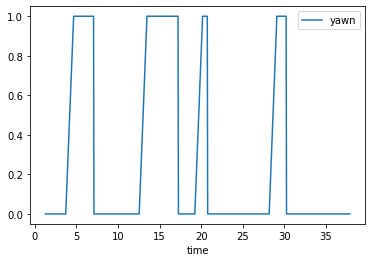

In [3]:
#YAWNNN

import numpy as np
import scipy.spatial.distance as dist
import dlib
import cv2
import pandas as pd
import time

def mouth_aspect_ratio(mouth):
    A = dist.euclidean(mouth[13], mouth[19])
    B = dist.euclidean(mouth[14], mouth[18])
    C = dist.euclidean(mouth[15], mouth[17])
    D = dist.euclidean(mouth[12], mouth[16])
    mar = (A + B + C) / (2.0 * D)
    return mar

thresh = 0.4 # adjust this value as needed
frame_check = 20
detect = dlib.get_frontal_face_detector()
predict = dlib.shape_predictor(r"C:\Users\Najeeb\Downloads\shape_predictor_68_face_landmarks.dat\shape_predictor_68_face_landmarks.dat")

(mStart, mEnd) = (48, 68) # indices of the mouth landmarks

cap=cv2.VideoCapture(0)
flag=0
start_time = time.time()
df = pd.DataFrame(columns=["real time", "time", "yawn"])
while True:
    ret, frame=cap.read()
    frame = cv2.flip(frame, 1) # flip the image horizontally
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    subjects = detect(gray, 0)
    for subject in subjects:
        shape = predict(gray, subject)
        shape = np.array([(shape.part(i).x, shape.part(i).y) for i in range(68)]) #converting to NumPy Array
        mouth = shape[mStart:mEnd]
        mar = mouth_aspect_ratio(mouth)
        mouthHull = cv2.convexHull(mouth)
        cv2.drawContours(frame, [mouthHull], -1, (0, 255, 0), 1)
        if mar > thresh:
            flag += 1
            if flag >= frame_check:
                cv2.putText(frame, "*****ALERT!*****", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                cv2.putText(frame, "*****ALERT!*****", (10,325),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                current_time = time.time()
                df = df.append({"real time": time.strftime("%H:%M:%S"), "time": current_time - start_time, "yawn": 1}, ignore_index=True)
        else:
            flag = 0
            df = df.append({"real time": time.strftime("%H:%M:%S"), "time": time.time() - start_time, "yawn": 0}, ignore_index=True)
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        cv2.destroyAllWindows()
        cap.release()
        break

df.plot(x="time", y="yawn")


In [4]:
df.head()

,real time,time,yawn
0,13:24:02,1.270428,0
1,13:24:02,1.361185,0
2,13:24:02,1.399085,0
3,13:24:02,1.447953,0
4,13:24:02,1.487849,0


In [105]:
from platform import python_version

print(python_version())

3.9.7


In [106]:
import bs4

<AxesSubplot:xlabel='time'>

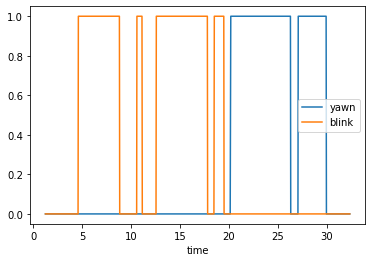

In [26]:
import numpy as np
import scipy.spatial.distance as dist
import dlib
import cv2
import pandas as pd
import time
from imutils import face_utils
import imutils

def mouth_aspect_ratio(mouth):
    A = dist.euclidean(mouth[13], mouth[19])
    B = dist.euclidean(mouth[14], mouth[18])
    C = dist.euclidean(mouth[15], mouth[17])
    D = dist.euclidean(mouth[12], mouth[16])
    mar = (A + B + C) / (2.0 * D)
    return mar

def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

thresh_mouth = 0.4
thresh_eye = 0.25
frame_check = 20
detect = dlib.get_frontal_face_detector()
predict = dlib.shape_predictor(r"C:\Users\Najeeb\Downloads\shape_predictor_68_face_landmarks.dat\shape_predictor_68_face_landmarks.dat")

(mStart, mEnd) = (48, 68)
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

cap=cv2.VideoCapture(0)
flag_mouth = 0
flag_eye = 0
start_time = time.time()
df = pd.DataFrame(columns=["real time", "time", "yawn", "blink"])

while True:
    ret, frame=cap.read()
    frame = imutils.resize(frame, width=450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    subjects = detect(gray, 0)
    for subject in subjects:
        shape = predict(gray, subject)
        shape = face_utils.shape_to_np(shape)

        # Yawn detection
        mouth = shape[mStart:mEnd]
        mar = mouth_aspect_ratio(mouth)
        mouthHull = cv2.convexHull(mouth)
        cv2.drawContours(frame, [mouthHull], -1, (0, 255, 0), 1)
        
        # Blink detection
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        ear = (leftEAR + rightEAR) / 2.0
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

        if mar > thresh_mouth:
            flag_mouth += 1
        else:
            flag_mouth = 0

        if ear < thresh_eye:
            flag_eye += 1
        else:
            flag_eye = 0

        if flag_mouth >= frame_check or flag_eye >= frame_check:
            cv2.putText(frame, "*****ALERT!*****", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            cv2.putText(frame, "*****ALERT!*****", (10,325),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            current_time = time.time()
            df = df.append({"real time": time.strftime("%H:%M:%S"), "time": current_time - start_time, "yawn": int(flag_mouth >= frame_check), "blink": int(flag_eye >= frame_check)}, ignore_index=True)
        else:
            df = df.append({"real time": time.strftime("%H:%M:%S"), "time": time.time() - start_time, "yawn": 0, "blink": 0}, ignore_index=True)

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        cv2.destroyAllWindows()
        cap.release()
        break

df.plot(x="time", y=["yawn", "blink"])

In [27]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['time'], y=df['yawn'], mode='lines', name='Yawn'))
fig.add_trace(go.Scatter(x=df['time'], y=df['blink'], mode='lines', name='Blink'))
fig.update_layout(title='Yawn and Blink Detection', xaxis_title='Time (seconds)', yaxis_title='Count')
fig.show()

In [28]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['time'], y=df['yawn'], mode='lines', name='Yawn', line=dict(color='violet')))
fig.update_layout(title='Yawn Detection', xaxis_title='Time (seconds)', yaxis_title='Count')
fig.show()

In [29]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['time'], y=df['blink'], mode='lines', name='Blink', line=dict(color='green')))
fig.update_layout(title='Blink Detection', xaxis_title='Time (seconds)', yaxis_title='Count')
fig.show()

In [30]:
df.head()

,real time,time,yawn,blink
0,02:42:50,1.258867,0,0
1,02:42:50,1.345660,0,0
2,02:42:50,1.375554,0,0
3,02:42:50,1.418754,0,0
4,02:42:50,1.450669,0,0


In [31]:
df.describe()

,time
count,853.000000
mean,15.995724
std,8.859658
min,1.258867
25%,8.387614
50%,15.486155
75%,23.753157
max,32.379197


In [32]:
from datetime import datetime
import pandas as pd
yawn_start = None
yawn_end = None
yawn_times = []

yawn_durations = []

for i, row in df.iterrows():
    if row['yawn'] == 1:
        if yawn_start is None:
            yawn_start = row['real time']
        yawn_end = row['real time']
    elif yawn_start is not None:
        yawn_durations.append({'Yawn': len(yawn_durations)+1, 'Start Time': yawn_start, 'End Time': yawn_end, 'Duration': datetime.strptime(yawn_end, '%H:%M:%S') - datetime.strptime(yawn_start, '%H:%M:%S')})
        yawn_start = None
        yawn_end = None

if yawn_start is not None:
    yawn_durations.append({'Yawn': len(yawn_durations)+1, 'Start Time': yawn_start, 'End Time': yawn_end, 'Duration': datetime.strptime(yawn_end, '%H:%M:%S') - datetime.strptime(yawn_start, '%H:%M:%S')})

yawn_df = pd.DataFrame(yawn_durations)
yawn_df = yawn_df.sort_values(by='Duration', ascending=False)

print(yawn_df)

   Yawn Start Time  End Time        Duration
0     1   02:43:09  02:43:15 0 days 00:00:06
1     2   02:43:16  02:43:19 0 days 00:00:03


In [43]:
blink_start = None
blink_end = None
blink_times = []

for i, row in df.iterrows():
    if row['blink'] == 1:
        if blink_start is None:
            blink_start = row['real time']
        blink_end = row['real time']
    elif blink_start is not None:
        blink_times.append((blink_start, blink_end))
        blink_start = None
        blink_end = None

if blink_start is not None:
    blink_times.append((blink_start, blink_end))

print("Blink times:")
q = 1
for blink in blink_times:
    print("Blink " , ": Start time:", blink[0], "End time:", blink[1])
    q=+1

Blink times:
Blink  : Start time: 02:42:53 End time: 02:42:58
Blink  : Start time: 02:42:59 End time: 02:43:00
Blink  : Start time: 02:43:01 End time: 02:43:07
Blink  : Start time: 02:43:07 End time: 02:43:08


In [45]:
from datetime import datetime
import pandas as pd

blink_durations = []

for i, blink in enumerate(blink_times):
    start_time = datetime.strptime(blink[0], '%H:%M:%S')
    end_time = datetime.strptime(blink[1], '%H:%M:%S')
    duration = (end_time - start_time).total_seconds()
    
    blink_durations.append({'Blink': i+1, 'Start Time': blink[0], 'End Time': blink[1], 'Duration': duration})

blink_df = pd.DataFrame(blink_durations)
blink_df = blink_df.sort_values(by='Duration', ascending=False)

print(blink_df)

   Blink Start Time  End Time  Duration
2      3   02:43:01  02:43:07       6.0
0      1   02:42:53  02:42:58       5.0
1      2   02:42:59  02:43:00       1.0
3      4   02:43:07  02:43:08       1.0
